In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [3]:
df = pd.read_csv("./bread basket.csv")

In [4]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
dropData = ["date_time","period_day","weekday_weekend"] 

df.drop(labels=None,columns=dropData,inplace=True)

In [8]:
df.head()

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [9]:
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

df.head(9)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry


In [10]:
transactions_str = df.groupby(['Transaction'])['Item'].apply(list).reset_index(name ='Items')
transactions_str

,Transaction,Items
0,1,[bread]
1,2,"[scandinavian, scandinavian]"
2,3,"[hot chocolate, jam, cookies]"
3,4,[muffin]
4,5,"[coffee, pastry, bread]"
...,...,...
9460,9680,[bread]
9461,9681,"[truffles, tea, spanish brunch, christmas common]"
9462,9682,"[muffin, tacos/fajita, coffee, tea]"
9463,9683,"[coffee, pastry]"


In [11]:
transactions_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  9465 non-null   int64 
 1   Items        9465 non-null   object
dtypes: int64(1), object(1)
memory usage: 148.0+ KB


In [12]:
my_basket = transactions_str["Items"].tolist()

my_basket


[['bread'],
 ['scandinavian', 'scandinavian'],
 ['hot chocolate', 'jam', 'cookies'],
 ['muffin'],
 ['coffee', 'pastry', 'bread'],
 ['medialuna', 'pastry', 'muffin'],
 ['medialuna', 'pastry', 'coffee', 'tea'],
 ['pastry', 'bread'],
 ['bread', 'muffin'],
 ['scandinavian', 'medialuna'],
 ['bread', 'medialuna', 'bread'],
 ['jam', 'coffee', 'tartine', 'pastry', 'tea'],
 ['basket', 'bread', 'coffee'],
 ['bread', 'medialuna', 'pastry'],
 ['mineral water', 'scandinavian'],
 ['bread', 'medialuna', 'coffee'],
 ['hot chocolate'],
 ['farm house'],
 ['farm house', 'bread'],
 ['bread', 'medialuna'],
 ['coffee', 'coffee', 'medialuna', 'bread'],
 ['jam'],
 ['scandinavian', 'muffin'],
 ['bread'],
 ['scandinavian'],
 ['fudge'],
 ['scandinavian'],
 ['coffee', 'bread'],
 ['bread', 'jam'],
 ['bread'],
 ['basket'],
 ['scandinavian', 'muffin'],
 ['coffee'],
 ['coffee', 'muffin'],
 ['muffin', 'scandinavian'],
 ['tea', 'bread'],
 ['coffee', 'bread'],
 ['bread', 'tea'],
 ['scandinavian'],
 ['juice', 'tartine', 

In [13]:
my_basket_sets = pd.DataFrame(my_basket)

In [14]:
my_basket_sets


,0,1,2,3,4,5,6,7,8,9,10
0,bread,None,None,None,None,None,None,None,None,None,None
1,scandinavian,scandinavian,None,None,None,None,None,None,None,None,None
2,hot chocolate,jam,cookies,None,None,None,None,None,None,None,None
3,muffin,None,None,None,None,None,None,None,None,None,None
4,coffee,pastry,bread,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
9460,bread,None,None,None,None,None,None,None,None,None,None
9461,truffles,tea,spanish brunch,christmas common,None,None,None,None,None,None,None
9462,muffin,tacos/fajita,coffee,tea,None,None,None,None,None,None,None
9463,coffee,pastry,None,None,None,None,None,None,None,None,None


In [17]:
min_n_products = 2
min_support = 7/len(my_basket_sets)

#max_length = max([len(x) for x in my_basket_sets])



In [20]:
from pyECLAT import ECLAT

my_eclat = ECLAT(data=my_basket_sets ,verbose=True)


rule_indices, rule_supports = my_eclat.fit(min_support=min_support,min_combination=min_n_products)


100%|██████████| 95/95 [00:00<00:00, 2259.61it/s]
10it [00:00, 92.42it/s]

Combination 2 by 2


2145it [00:22, 96.86it/s] 
11it [00:00, 105.78it/s]

Combination 3 by 3


45760it [07:10, 106.38it/s]


In [21]:
print(rule_supports)

{'spanish brunch & soup': 0.0010565240359218173, 'spanish brunch & chicken stew': 0.001162176439513999, 'spanish brunch & extra salami or feta': 0.0008452192287374538, 'spanish brunch & toast': 0.0010565240359218173, 'spanish brunch & cake': 0.002324352879027998, 'spanish brunch & cookies': 0.0007395668251452721, 'spanish brunch & coffee': 0.010882197569994718, 'spanish brunch & juice': 0.002746962493396725, 'spanish brunch & bread': 0.004754358161648178, 'spanish brunch & smoothies': 0.0009508716323296355, 'spanish brunch & medialuna': 0.0007395668251452721, 'spanish brunch & truffles': 0.0017960908610670893, 'spanish brunch & salad': 0.0012678288431061807, 'spanish brunch & sandwich': 0.001901743264659271, 'spanish brunch & alfajores': 0.0010565240359218173, 'spanish brunch & hot chocolate': 0.0008452192287374538, 'spanish brunch & the nomad': 0.0009508716323296355, 'spanish brunch & tea': 0.004648705758055996, 'mineral water & soup': 0.001901743264659271, 'mineral water & cake': 0.0

In [22]:
import matplotlib.pylab as plt

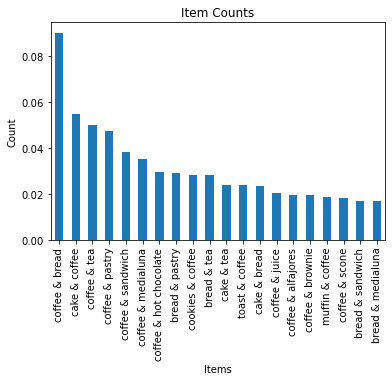

In [25]:
df2 = pd.DataFrame.from_dict(rule_supports, orient='index', columns=['count'])
df2_sorted = df2.sort_values(by ="count", ascending=False)

df2_top_items = df2_sorted.head(20)

df2_top_items.plot(kind="bar", legend=False)
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Item Counts')
plt.show()